Columns present: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Embarked  891 non-null    category
dtypes: category(2), float64(2), int64(4), object(1)
memory usage

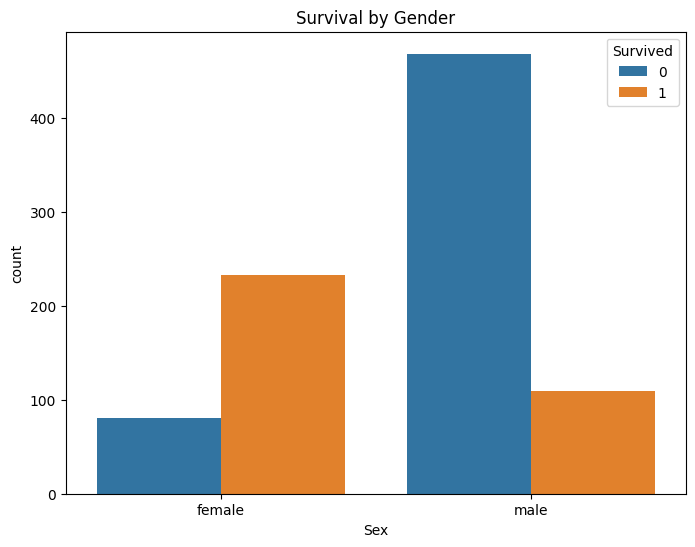

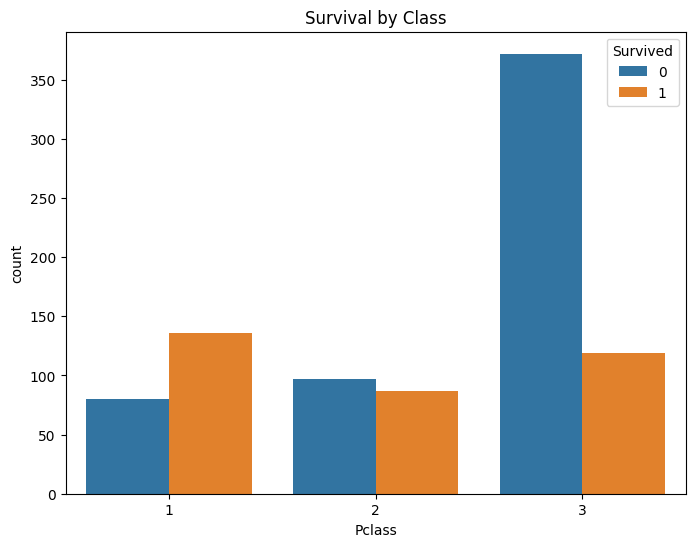

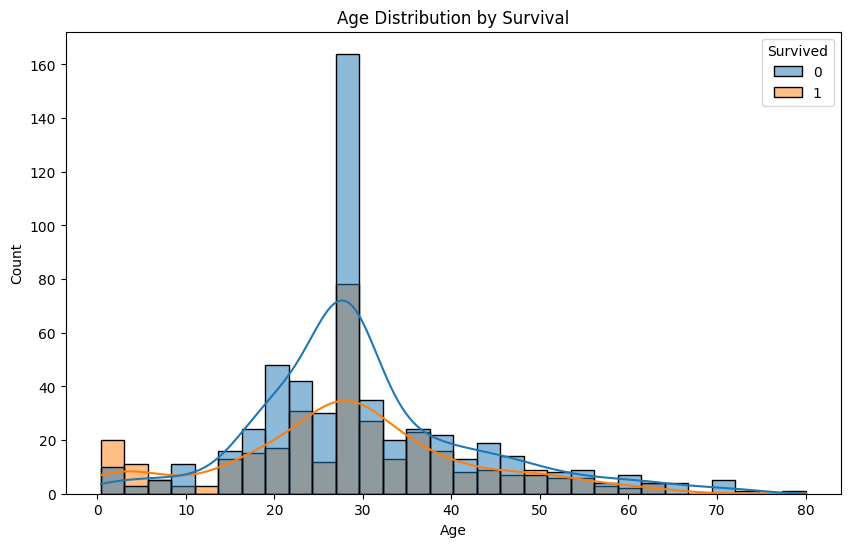

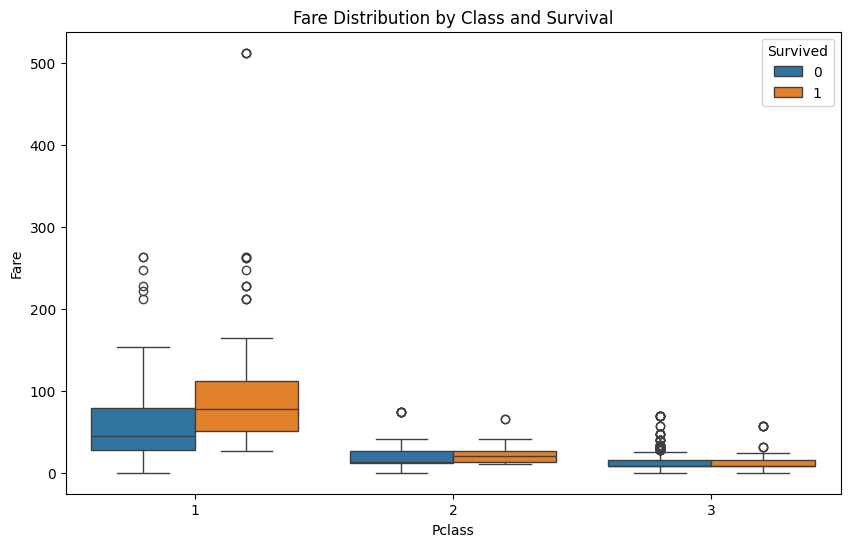

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paths to the uploaded files
train_path = '/content/train.csv'
test_path = '/content/test.csv'
gender_submission_path = '/content/gender_submission.csv'

# Load the training dataset
train_df = pd.read_csv(train_path)

# Display the first few rows of the dataset
train_df.head()
# Check the columns present in the dataset
columns_present = train_df.columns.tolist()

# Print the columns present in the dataset
print(f"Columns present: {columns_present}")

# Check for missing values
missing_values = train_df.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Drop irrelevant columns if they exist
columns_to_drop = ['PassengerId', 'Ticket', 'Cabin']
for column in columns_to_drop:
    if column in train_df.columns:
        train_df = train_df.drop(columns=[column])

# Fill missing 'Age' values with the median
if 'Age' in train_df.columns:
    train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most common value
if 'Embarked' in train_df.columns:
    train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Convert 'Sex' and 'Embarked' to categorical types if they exist
if 'Sex' in train_df.columns:
    train_df['Sex'] = train_df['Sex'].astype('category')

if 'Embarked' in train_df.columns:
    train_df['Embarked'] = train_df['Embarked'].astype('category')

# Display dataset info
train_df.info()

# Describe the dataset
dataset_description = train_df.describe(include='all')
print(f"Dataset description:\n{dataset_description}")

# Plot: Survival rate by gender
if 'Sex' in train_df.columns and 'Survived' in train_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_df, x='Sex', hue='Survived')
    plt.title('Survival by Gender')
    plt.show()

# Plot: Survival rate by class
if 'Pclass' in train_df.columns and 'Survived' in train_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_df, x='Pclass', hue='Survived')
    plt.title('Survival by Class')
    plt.show()

# Plot: Age distribution for survivors vs. non-survivors
if 'Age' in train_df.columns and 'Survived' in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train_df, x='Age', hue='Survived', kde=True)
    plt.title('Age Distribution by Survival')
    plt.show()

# Plot: Boxplot of fares by class and survival status
if 'Pclass' in train_df.columns and 'Fare' in train_df.columns and 'Survived' in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x='Pclass', y='Fare', hue='Survived')
    plt.title('Fare Distribution by Class and Survival')
    plt.show()

# Correlation matrix
if 'Fare' in train_df.columns and 'Age' in train_df.columns:
    corr_matrix = train_df.corr()
    print(f"Correlation matrix:\n{corr_matrix}")

    # Plot: Heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
